# Transformada Discreta de Fourier

### Prof. Pedro Peixoto <ppeixoto@usp.br>

Maio 2022

Referências:

[1] https://jakevdp.github.io/blog/2013/08/28/understanding-the-fft/
[2] https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.03-Fast-Fourier-Transform.html



In [3]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


In [15]:
# Frequencia de amostragem (número de pontos na série)
n = 200

# Início
t0 = 0

# Fim
tf = 1

# Intervalo de tempo (delta t)
dt = (tf-t0)/n

# Amostragem no tempo

tempo = np.arange(t0, tf, dt)


[0.    0.005 0.01  0.015 0.02  0.025 0.03  0.035 0.04  0.045 0.05  0.055
 0.06  0.065 0.07  0.075 0.08  0.085 0.09  0.095 0.1   0.105 0.11  0.115
 0.12  0.125 0.13  0.135 0.14  0.145 0.15  0.155 0.16  0.165 0.17  0.175
 0.18  0.185 0.19  0.195 0.2   0.205 0.21  0.215 0.22  0.225 0.23  0.235
 0.24  0.245 0.25  0.255 0.26  0.265 0.27  0.275 0.28  0.285 0.29  0.295
 0.3   0.305 0.31  0.315 0.32  0.325 0.33  0.335 0.34  0.345 0.35  0.355
 0.36  0.365 0.37  0.375 0.38  0.385 0.39  0.395 0.4   0.405 0.41  0.415
 0.42  0.425 0.43  0.435 0.44  0.445 0.45  0.455 0.46  0.465 0.47  0.475
 0.48  0.485 0.49  0.495 0.5   0.505 0.51  0.515 0.52  0.525 0.53  0.535
 0.54  0.545 0.55  0.555 0.56  0.565 0.57  0.575 0.58  0.585 0.59  0.595
 0.6   0.605 0.61  0.615 0.62  0.625 0.63  0.635 0.64  0.645 0.65  0.655
 0.66  0.665 0.67  0.675 0.68  0.685 0.69  0.695 0.7   0.705 0.71  0.715
 0.72  0.725 0.73  0.735 0.74  0.745 0.75  0.755 0.76  0.765 0.77  0.775
 0.78  0.785 0.79  0.795 0.8   0.805 0.81  0.815 0.

### Composição de ondas

In [16]:
f1 = 3
onda1 = np.sin(2*np.pi*f1*tempo)

f2 = 10
onda2 = np.sin(2*np.pi*f2*tempo)


Text(0.5, 0, 'Tempo')

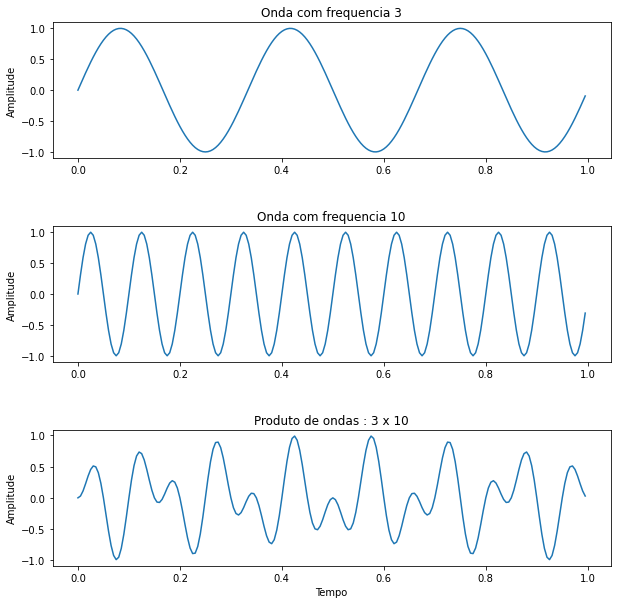

In [21]:
# Gráficos
figure, axs = plt.subplots(3, 1, figsize=(10,10))

plt.subplots_adjust(hspace=0.5)

axs[0].plot(tempo, onda1)
axs[0].set_title("Onda com frequencia "+str(f1))
axs[0].set_ylabel("Amplitude")

axs[1].plot(tempo, onda2)
axs[1].set_title("Onda com frequencia "+str(f2))
axs[1].set_ylabel("Amplitude")


axs[2].plot(tempo, onda1*onda2)
axs[2].set_title("Produto de ondas : "+str(f1)+" x "+str(f2))
axs[2].set_ylabel("Amplitude")
axs[2].set_xlabel("Tempo")



### Transformada de Fourier

Geralmente é usada a transformada na forma complexa, com exp(ix), ao invés da expandida em senos e cosenos.

Ver detalhes aqui: https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.02-Discrete-Fourier-Transform.html

(0.0, 30.0)

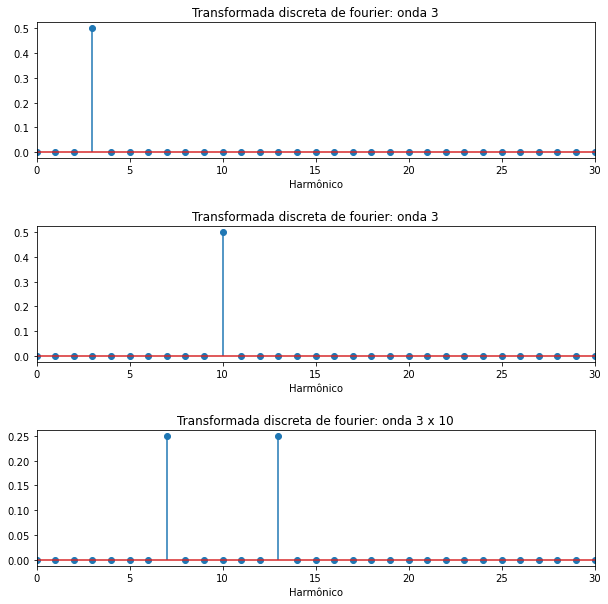

In [39]:
from scipy.fft import rfft

# Transformada de Fourier para séries reais
tdf1 = rfft(onda1)/len(onda1) 
tdf2 = rfft(onda2)/len(onda1)
tdf3 = rfft(onda1*onda2)/len(onda1)

figure, axs = plt.subplots(3, 1, figsize=(10,10))

plt.subplots_adjust(hspace=0.5)

axs[0].stem(np.abs(tdf1))
axs[0].set_title("Transformada discreta de fourier: onda "+str(f1))
axs[0].set_xlabel("Harmônico")
axs[0].set_xlim(0,30)

axs[1].stem(np.abs(tdf2))
axs[1].set_title("Transformada discreta de fourier: onda "+str(f1))
axs[1].set_xlabel("Harmônico")
axs[1].set_xlim(0,30)

axs[2].stem(np.abs(tdf3))
axs[2].set_title("Transformada discreta de fourier: onda "+str(f1)+" x "+str(f2))
axs[2].set_xlabel("Harmônico")
axs[2].set_xlim(0,30)


### Transformada Inversa

Text(0.5, 0, 'Tempo')

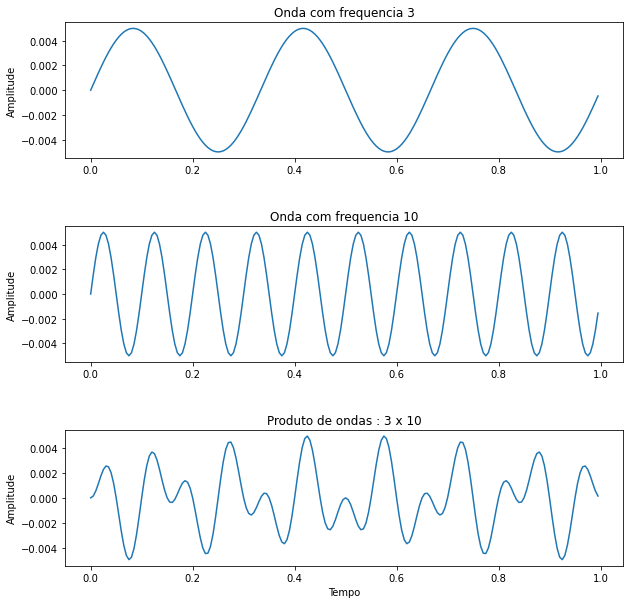

In [40]:
from scipy.fft import rfft, irfft

# Transformada de Fourier para séries reais
onda1_recon = irfft(tdf1)
onda2_recon = irfft(tdf2)
onda3_recon = irfft(tdf3)

# Gráficos
figure, axs = plt.subplots(3, 1, figsize=(10,10))

plt.subplots_adjust(hspace=0.5)

axs[0].plot(tempo, onda1_recon)
axs[0].set_title("Onda com frequencia "+str(f1))
axs[0].set_ylabel("Amplitude")

axs[1].plot(tempo, onda2_recon)
axs[1].set_title("Onda com frequencia "+str(f2))
axs[1].set_ylabel("Amplitude")


axs[2].plot(tempo, onda3_recon)
axs[2].set_title("Produto de ondas : "+str(f1)+" x "+str(f2))
axs[2].set_ylabel("Amplitude")
axs[2].set_xlabel("Tempo")



Mostrar exemplo de:
https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.04-FFT-in-Python.html